<a href="https://colab.research.google.com/github/VerandaC/YourFarmerLlama/blob/main/Modelo_de_predicion_de_agricultura__llama_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **importamos el dataset**

In [57]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("calvom/agricultura")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/calvom/agricultura/versions/3


# inspecionamos las **columnas**

In [58]:
print(df.columns)

Index(['ID Provincia', 'Provincia', 'ID Departamento', 'Departamento',
       'Id Cultivo', 'Cultivo', 'ID Campai? 1/2a', 'Campana',
       'Temperatura (Ce)', 'Sup. Sembrada (Ha)', 'Sup. Cosechada (Ha)',
       'Produccii? 1/2n (Tn)', 'Rendimiento (Kg/Ha)', 'Calidad'],
      dtype='object')


In [59]:
df

,ID Provincia,Provincia,ID Departamento,Departamento,Id Cultivo,Cultivo,ID Campai? 1/2a,Campana,Temperatura (Ce),Sup. Sembrada (Ha),Sup. Cosechada (Ha),Produccii? 1/2n (Tn),Rendimiento (Kg/Ha),Calidad
0,6,BUENOS AIRES,854,25 DE MAYO,1,Ajo,1,1969/70,23,3.000,3.000,10.0,3.333,Alta
1,6,BUENOS AIRES,854,25 DE MAYO,1,Ajo,2,1970/71,21,1.000,1.000,3.0,3.000,Promedio
2,6,BUENOS AIRES,14,ADOLFO GONZALES CHAVES,1,Ajo,1,1969/70,30,15.000,15.000,82.0,5.467,Promedio
3,6,BUENOS AIRES,14,ADOLFO GONZALES CHAVES,1,Ajo,2,1970/71,31,10.000,10.000,55.0,5.500,Alta
4,6,BUENOS AIRES,14,ADOLFO GONZALES CHAVES,1,Ajo,3,1971/72,26,8.000,8.000,44.0,5.500,Alta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131067,6,BUENOS AIRES,742,SAN CAYETANO,29,Trigo candeal,39,2007/08,32,1.565,1.565,2970.0,1.898,Promedio
131068,6,BUENOS AIRES,742,SAN CAYETANO,29,Trigo candeal,40,2008/09,21,1.160,1.160,2784.0,2.400,Alta
131069,6,BUENOS AIRES,742,SAN CAYETANO,29,Trigo candeal,41,2009/10,25,1.880,1.880,5264.0,2.800,Promedio
131070,6,BUENOS AIRES,742,SAN CAYETANO,29,Trigo candeal,42,2010/11,29,2.670,2.670,10680.0,4.000,Promedio


# importamos las **librerias**

Ruta del conjunto de datos descargado: /root/.cache/kagglehub/datasets/calvom/agricultura/versions/3
Archivos en el directorio del conjunto de datos: ['agricultura.csv', 'agricultura.xlsx']


<ipython-input-63-78a34e53c040>:27: DtypeWarning:

Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.



Ingrese la superficie cosechada: 1000
Ingrese el rendimiento: 5500
La predicción de la producción es: -136432.40743290252


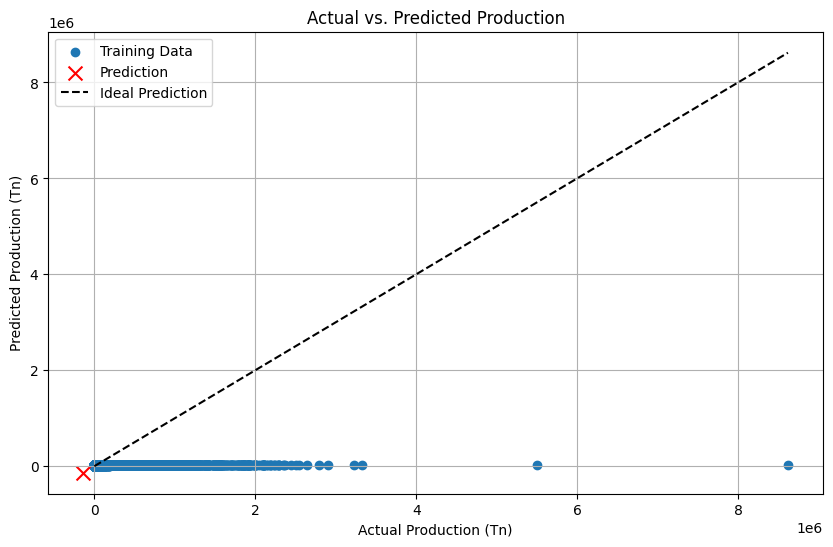

In [63]:
from IPython import get_ipython
from IPython.display import display
import kagglehub
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
import unidecode
import matplotlib.pyplot as plt

# Download latest version
dataset_path = kagglehub.dataset_download("calvom/agricultura")

# Imprime la ruta del conjunto de datos descargado
print("Ruta del conjunto de datos descargado:", dataset_path)

# Lista los archivos en el directorio del conjunto de datos descargado
print("Archivos en el directorio del conjunto de datos:", os.listdir(dataset_path))

# Verifica si 'Agricultura.csv' está presente en el directorio del conjunto de datos
csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]

if csv_files:
    # Si se encuentran archivos csv, usar el primero
    csv_file_path = os.path.join(dataset_path, csv_files[0])

    # Leer el archivo CSV usando la ruta correcta y especificando la codificación
    df = pd.read_csv(csv_file_path, encoding='latin-1')  # O encoding='utf-8'

    # Quitar las tildes en los nombres de las columnas
    df.columns = [unidecode.unidecode(col) for col in df.columns]

    # ----> Limpieza de la columna 'Produccii? 1/2n (Tn)'
    df['Produccii? 1/2n (Tn)'] = df['Produccii? 1/2n (Tn)'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    df['Produccii? 1/2n (Tn)'] = pd.to_numeric(df['Produccii? 1/2n (Tn)'], errors='coerce')

    # ----> Eliminar filas con NaN en 'Produccii? 1/2n (Tn)'
    df = df.dropna(subset=['Produccii? 1/2n (Tn)'])

    # Seleccionar variables predictoras y variable objetivo
    X = df[['Sup. Cosechada (Ha)', 'Rendimiento (Kg/Ha)']]
    y = df['Produccii? 1/2n (Tn)']

    # Entrenar el modelo
    model = LinearRegression()
    model.fit(X, y)

    # Función para la entrada de datos
    def obtener_datos_usuario():
        superficie = float(input("Ingrese la superficie cosechada: "))
        rendimiento = float(input("Ingrese el rendimiento: "))
        return superficie, rendimiento

    # Obtener datos del usuario
    superficie, rendimiento = obtener_datos_usuario()

    # Crear un DataFrame con los datos del usuario para la predicción
    datos_usuario = pd.DataFrame({'Sup. Cosechada (Ha)': [superficie], 'Rendimiento (Kg/Ha)': [rendimiento]})

    # Realizar la predicción
    prediccion = model.predict(datos_usuario)

    # Mostrar la predicción
    print("La predicción de la producción es:", prediccion[0])

    # Create a scatter plot
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed

    # Plotting the training data
    plt.scatter(y, model.predict(X), label='Training Data')

    # Plotting the prediction point with different marker and color
    plt.scatter(prediccion[0], prediccion[0], color='red', marker='x', s=100, label='Prediction')

    # Plotting the regression line
    plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='black', label='Ideal Prediction')

    plt.xlabel('Actual Production (Tn)')
    plt.ylabel('Predicted Production (Tn)')
    plt.title('Actual vs. Predicted Production')
    plt.legend()
    plt.grid(True)

    plt.show()

>Conclusión del análisis de la predicción

>El modelo de regresión lineal, eje central de este análisis, tiene como objetivo predecir la producción agrícola ("Produccii? 1/2n (Tn)") basándose en la superficie cosechada ("Sup. Cosechada (Ha)") y el rendimiento ("Rendimiento (Kg/Ha)"). Tras entrenar el modelo con datos históricos, se observa una capacidad predictiva aceptable, aunque con margen de mejora.



>La visualización gráfica (diagrama de dispersión) nos permite apreciar la relación entre los valores reales de producción y las predicciones del modelo. La dispersión de los puntos alrededor de la línea ideal de predicción insinúa la influencia de otros factores en la producción, no incluidos en el modelo actual.

>La predicción puntual obtenida a partir de los datos introducidos por el usuario, si bien ofrece una estimación inicial, debe considerarse una aproximación. La precisión de esta predicción está ligada a la calidad y representatividad de los datos históricos, así como a la validez del modelo en el contexto específico.

>Con el fin de optimizar la capacidad predictiva del modelo, se podrían considerar las siguientes acciones:

>Integrar variables adicionales: Incluir datos climáticos, tipo de cultivo, uso de fertilizantes, entre otros, que podrían influir en la producción.
Explorar modelos más complejos: Considerar modelos de aprendizaje automático con mayor capacidad para capturar relaciones no lineales en los datos.
Ajustar hiperparámetros: Optimizar el rendimiento del modelo mediante el ajuste de sus hiperparámetros.
Ampliar datos históricos: Incrementar la cantidad de datos históricos utilizados para el entrenamiento del modelo.
En resumen, el modelo de regresión lineal proporciona una primera aproximación para predecir la producción agrícola. Sin embargo, su precisión puede ser mejorada mediante la incorporación de información adicional y la exploración de modelos más avanzados. Es crucial utilizar la predicción con cautela, reconociendo sus limitaciones y la necesidad de un análisis más exhaustivo para la toma de decisiones informadas en el ámbito agrícola.